## Module 4: Mpox (DR Congo 2023-2025)


## Team Members:
Meredith Lineweaver and Medha Tadavarthi

## Project Title:
Monkeypox in the DR Congo from 2023-2025


## Project Goal:
This project seeks to model how the number of infected individuals with mpox in the Democratic Republic of the Congo changes over time from 2023–2025. We focus on fitting an SIR model to observed infection data and evaluating how well the model captures the observed infection trends.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence: There has been an outbreak of monkeypox in the DR Congo with incidence in 2023 being 15,000 cases and increasing to 54,000 cases in 2024. There are currently over 46,000 cases in central and east Africa. Since the beginning of the year, in the DRC, there have been 20,000 reported cases of mpox and over 630 deaths. However, there is not a great system for reporting cases so these numbers are estimations. This outbreak has been deemed a public health emergency by the World Health Organization. 
* Economic burden: These outbreaks place a significant strain on healthcare financing in Africa. This leads to inadequate allocation of resources in an already overburdened healthcare system. This also raises the costs of out-of-pocket health expenses. The average allocation of government budgets to healthcare across Africa is 7.2%. An estimated $245 million is needed to combat the grwoing mpox outbreak in Africa and only 10% of that number has been secured. This means most of the financial burden is on patients. The average price for the mpox vaccine in Africa is between $100 and $140 per dose. 
* Risk factors (genetic, lifestyle) & Societal determinants: The biggest risk factor is coming into contact with someone that has the disease. However certain factors can cause more severe illness such as having a weakened immune system, a young age, and pregnancy. Specifically in the DR Congo risks include malnutrition, poor sanitation, population displacement, and ongoing conflict that weakens health systems and increase transmission. Sexual contact including having multiple sexual partners and unprotected anal sex. 
* Symptoms: Rash, fever, exhaustation, swollen lympth nodes, muscle aches, sore throat, blisters that crust over. 
* Diagnosis: Diagnosed by a healthcare provider that swabs the rash and the sample is tested in a lab (such as PCR test). 
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): Folowing exposure to the respiratory secretions or bodily fluids of Mpox patients, the virus enters nearby tissues through mucous membrances or broken skin. The disease starts by entering a host cell, which is typically the skin. The virus replicates its DNA in the cytoplasm and assembles new virus particles. It then releases them to infect other cells. It first spreads to nearby lymph nodes and then into the bloodstream and other organs for a systemic infection. The virus also needs to evade the immune system so it will secrete proteins that interfere with immune signals and immune cell function. 

Sources: 
* https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(25)00137-0/fulltext
* https://www.cdc.gov/monkeypox/situation-summary/index.html
* https://www.doctorswithoutborders.org/latest/mpox-outbreak-dr-congo-what-know
* https://pmc.ncbi.nlm.nih.gov/articles/PMC11638650/
* https://www.nature.com/articles/s41392-023-01675-2

## Dataset: 

The data set we will analyze is a csv file that has the date in one column and the confirmed number of new cases for that week in the other column. This data was obtained by reporting the number of confirmed cases as defined by WHO's working case definition published in the surveilance, case investigation and contact tracing for mpox interim guidance. For the DR Congo there is suboptimal testing rate so both laboratory confirmed cases and suspected cases are shown. 

Source of the data: https://worldhealthorg.shinyapps.io/mpx_global/_w_916c8baf/_w_a524e3ae26d84d45bd7af0be6a7698a9/#sec-down

           date  confirmed_cases
0    2023-01-08                1
1    2023-01-15                1
2    2023-01-22                4
3    2023-01-29                1
4    2023-02-05                0
..          ...              ...
138  2025-08-31              371
139  2025-09-07              339
140  2025-09-14              428
141  2025-09-21              230
142  2025-09-28              286

[143 rows x 2 columns]


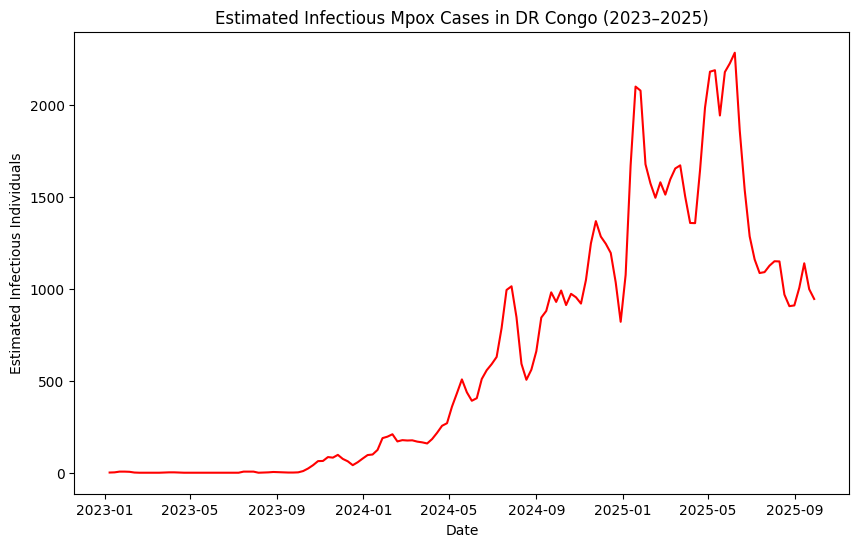

In [39]:
## LOAD YOUR DATASET HERE.
import os
os.chdir("C:/Users/hjr9xh/PycharmProjects/module4/")
import pandas as pd
from main_functions import convert_cumulative_to_SIR
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 1. Read in the csv file of cumulative cases.
df = pd.read_csv("C:/Users/hjr9xh/PycharmProjects/module4/mpox_dem_rep_of_congo_data_2023_2025_new_cases.csv")
print(df)
df['date'] = pd.to_datetime(df['date'])

# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
df['cumulative_cases'] = df['confirmed_cases'].cumsum()
population = 109075560 #individuals
infectious_period = 3

df_sir = convert_cumulative_to_SIR(
    df,
    date_col = "date",
    cumulative_col = "cumulative_cases",
    population = population, 
    infectious_period = infectious_period, 
    new_case_col = "new_cases",
    I_col = 'I_est', 
    R_col = "R_est", 
    S_col = "S_est"
)


# 3. Plot S, I, R over time.
plt.figure(figsize=(10,6))
plt.plot(df_sir['date'], df_sir['I_est'], color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Infectious Individuals')
plt.title('Estimated Infectious Mpox Cases in DR Congo (2023–2025)')
plt.show()


## Data Analyis: 

### Methods

We modeled the infected population over time using the SIR model for the number of infected individuals. Euler’s method was combined with optimization of the sum of squared error to select the best values of beta and gamma for our dataset. The model predictions for infections were then compared to the observed data, and a Runge–Kutta solver was later used to reduce numerical error and assess how the choice of numerical method


### Analysis


### 1. Fitting the SIR model

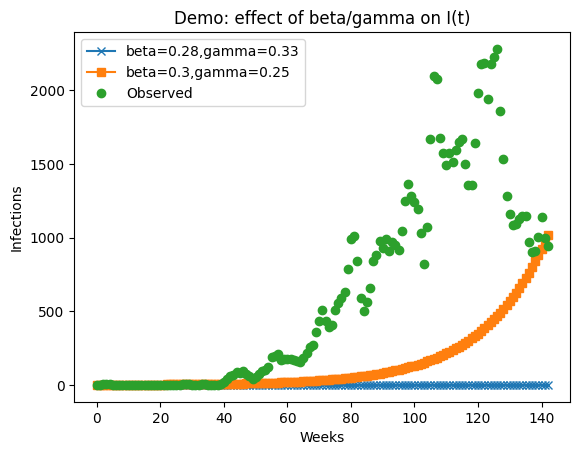

The SSE for beta1 and gamma1 is 853293.5112201266
The SSE for beta2 and gamma2 is 548395.5219665216
Best fit parameters:
beta = 0.2975951903807615
gamma = 0.24148296593186372
SSE = 431773.2686672074


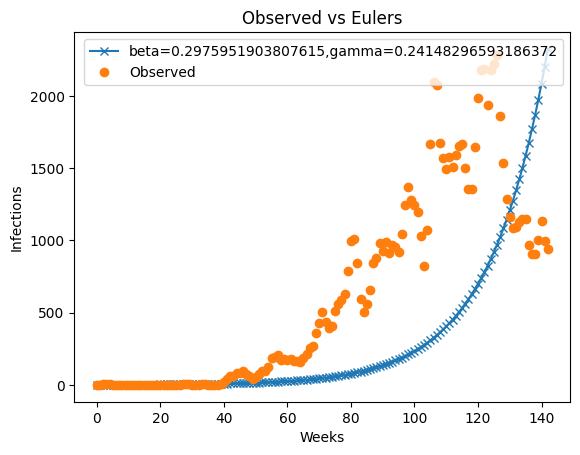

In [49]:
import numpy as np
import os
os.chdir("C:/Users/hjr9xh/PycharmProjects/module4/")
from main_functions import euler_sir

#Get S(t), l(t), and R(t) using Euler's method
I_obs = df_sir['I_est'].values.astype(float) #Sets up I_obs array from data directly
t_obs = np.arange(len(I_obs)) # time array in days

I0_obs = df_sir.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

#Plug in guesses for gamma and beta
beta1 = 0.28 #random guess for beta
gamma1 = 0.33 #random guess for gamma
beta2 = 0.30 #alternative guesses
gamma2 = 0.25 #alternative guesses
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, population)
S2,I2,R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, population)

#Plot model predictions and true l(t) and try to pick gamma and beta that make the model solution fit your data
plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

#Calculate SSE between model and true l(t)
print("The SSE for beta1 and gamma1 is",np.mean((I1 - I_obs)**2))

print("The SSE for beta2 and gamma2 is",np.mean((I2 - I_obs)**2))

# Use an optimization routine to minimize SSE and find the best-fitting parameters
beta_values = np.linspace(0, 0.30, 500)
gamma_values = np.linspace(0, 0.25, 500)

best_sse = np.inf
best_beta = None
best_gamma = None

# Nested loop: try all (beta, gamma) pairs
for beta in beta_values:
    for gamma in gamma_values:

        # Run SIR model
        S_test, I_test, R_test = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, population)

        # Compute SSE
        sse = np.mean((I_test - I_obs)**2)

        # Check if it's the best so far
        if sse < best_sse:
            best_sse = sse
            best_beta = beta
            best_gamma = gamma

# Print results
print("Best fit parameters:")
print(f"beta = {best_beta}")
print(f"gamma = {best_gamma}")
print(f"SSE = {best_sse}")


S, I, R = euler_sir(best_beta, best_gamma, S0_obs, I0_obs, R0_obs, t_obs, population)

plt.plot(t_obs, I, label=f'beta={best_beta},gamma={best_gamma}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections')
plt.title('Observed vs Eulers')
plt.show()


### 2. Predict "the future" with your fit SIR model

Best fit parameters on first half:
beta = 0.3
gamma = 0.21192384769539077
SSE = 782.5958157209437


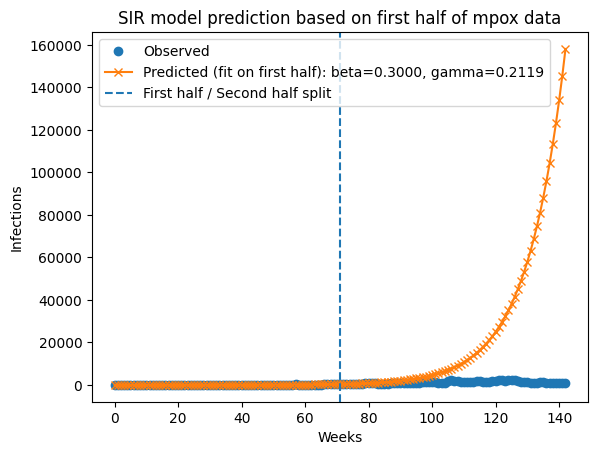

In [50]:
#Use Euler's method and your optimization routine above to find new gamma and beta on the FIRST HALF of the data
midpoint = len(df_sir)//2
first_half_df = df_sir.iloc[:midpoint] #df of first half of data

#Observed I(t) for first half + matching time array
I_obs_first_half = first_half_df['I_est'].values.astype(float)
t_obs_first_half = np.arange(len(I_obs_first_half))

I0_obs = first_half_df.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

beta_f_values = np.linspace(0, 0.30, 500)
gamma_f_values = np.linspace(0, 0.25, 500)

best_sse = np.inf
best_beta_f = None
best_gamma_f = None

# Nested loop: try all (beta, gamma) pairs
for beta in beta_f_values:
    for gamma in gamma_f_values:

        # Run SIR model
        S_test, I_test, R_test = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs_first_half, population)

        # Compute SSE
        sse = np.mean((I_test - I_obs_first_half)**2)

        # Check if it's the best so far
        if sse < best_sse:
            best_sse = sse
            best_beta_f = beta
            best_gamma_f = gamma

# Print results
print("Best fit parameters on first half:")
print(f"beta = {best_beta_f}")
print(f"gamma = {best_gamma_f}")
print(f"SSE = {best_sse}")

#Simulate the SIR model forward in time using those parameters and plot
I_obs_full = df_sir['I_est'].values.astype(float)
t_obs_full = np.arange(len(I_obs_full))

S_full, I_full, R_full = euler_sir(best_beta_f, best_gamma_f, S0_obs, I0_obs, R0_obs, t_obs_full, population)

plt.plot(t_obs_full, I_obs_full, 'o', label='Observed')
plt.plot(t_obs_full, I_full, label=f'Predicted (fit on first half): beta={best_beta_f:.4f}, gamma={best_gamma_f:.4f}', marker='x')
plt.axvline(midpoint, linestyle='--', label='First half / Second half split')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Infections')
plt.title('SIR model prediction based on first half of mpox data')
plt.show()


**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

Using only the first half of the data, the fitted values of beta and gamma are fairly close to what we found when fitting the full dataset. The SSE on the first half is relatively small, indicating a better fit. The SSE calculated for the second half of the data is 2188418360.3091435.

In [51]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.
I_pred_second_half = I_full[midpoint:]
I_obs_second_half = I_obs_full[midpoint:]
sse_second_half = np.mean((I_pred_second_half - I_obs_second_half)**2)
print("SSE on second half =", sse_second_half)

SSE on second half = 2188418360.3091435


**Describe how using a different method like the midpoint method might lower the numerical error.**

Using the midpoint method could lower the numerical error because it estimates the slope in the middle of each time step rather than only at the beginning like Euler’s method does. This can make the approximation more accurate when the number of infections is changing quickly, since the midpoint method better captures the overall shape of the curve. As a result, the model would accumulate less error over time and could produce predictions that stay closer to the observed data.

### 3. Decreasing numerical error with the RK4 method

In [66]:
# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Define the SIR differential equations for use with solve_ivp
# y = [S, I, R]
def sir_rhs(t, y, beta, gamma, N):
    S, I, R = y

    # SIR model equations
    dSdt = -(beta * S * I) / N
    dIdt = (beta * S * I) / N - gamma * I
    dRdt = gamma * I

    return [dSdt, dIdt, dRdt]

# Set up observed infectious data and time array (weekly data)
I_obs = df_sir['I_est'].values.astype(float)
t_obs = np.arange(len(I_obs))  # each step corresponds to one week

# Initial conditions taken from the first data point
I0_obs = I_obs[0]
R0_obs = 0.0
S0_obs = population - I0_obs - R0_obs

# Search ranges for beta and gamma
beta_values = np.linspace(0, 0.30, 500)
gamma_values = np.linspace(0, 0.25, 500)

# Track best-fit parameters and minimum SSE
best_sse_rk4 = np.inf
best_beta_rk4 = None
best_gamma_rk4 = None

# Loop over all beta and gamma combinations
for beta in beta_values:
    for gamma in gamma_values:

        # Solve the SIR system using RK4 (via solve_ivp)
        sol = solve_ivp(
            sir_rhs,
            t_span=(t_obs[0], t_obs[-1]),
            y0=[S0_obs, I0_obs, R0_obs],
            t_eval=t_obs,
            args=(beta, gamma, population),
            method='RK45'
        )

        # Extract the infectious population from the solution
        I_model = sol.y[1]

        # Compute SSE between RK4 model and observed data
        sse = np.mean((I_model - I_obs)**2)

        # Update best-fit parameters if SSE improves
        if sse < best_sse_rk4:
            best_sse_rk4 = sse
            best_beta_rk4 = beta
            best_gamma_rk4 = gamma

# Print best-fit parameters from RK4 optimization
print("Best fit parameters using RK4:")
print(f"beta = {best_beta_rk4}")
print(f"gamma = {best_gamma_rk4}")
print(f"SSE = {best_sse_rk4}")


Best fit parameters using RK4:
beta = 0.11122244488977956
gamma = 0.056613226452905806
SSE = 431787.0297581373


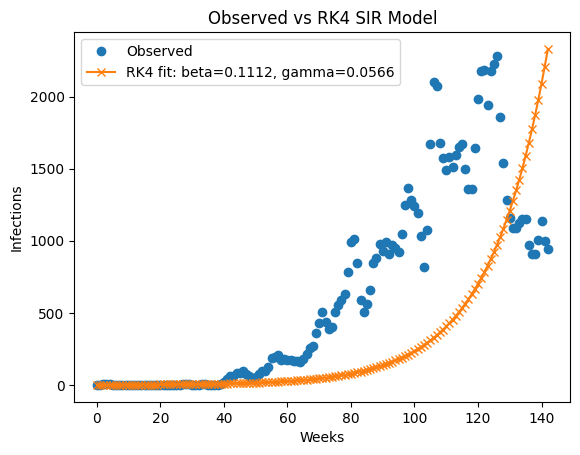

In [67]:
# Plot observed data vs RK4 best-fit model
sol_best = solve_ivp(
    sir_rhs,
    t_span=(t_obs[0], t_obs[-1]),
    y0=[S0_obs, I0_obs, R0_obs],
    t_eval=t_obs,
    args=(best_beta_rk4, best_gamma_rk4, population),
    method='RK45'
)

I_rk4_best = sol_best.y[1]

plt.plot(t_obs, I_obs, 'o', label='Observed')
plt.plot(
    t_obs, I_rk4_best,
    marker='x',
    label=f'RK4 fit: beta={best_beta_rk4:.4f}, gamma={best_gamma_rk4:.4f}'
)

plt.xlabel('Weeks')
plt.ylabel('Infections')
plt.title('Observed vs RK4 SIR Model')
plt.legend()
plt.show()

**Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?**

RK4 did not do a better job for the second half of the data as its SSE is slightly higher than that of the Euler's method.

In [61]:
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.

# Split data
midpoint = len(df_sir) // 2

# Observed infections on the second half of the data
I_obs_second = df_sir['I_est'].values.astype(float)[midpoint:]
t_obs_second = np.arange(len(I_obs_second))


# Fit RK4 on first half
best_sse_first_rk4 = np.inf
best_beta_first_rk4 = None
best_gamma_first_rk4 = None

for beta in beta_values:
    for gamma in gamma_values:
        sol_first = solve_ivp(
            sir_rhs,
            t_span=(t_obs_first_half[0], t_obs_first_half[-1]),
            y0=[S0_obs, I0_obs, R0_obs],
            t_eval=t_obs_first_half,
            args=(beta, gamma, population),
            method="RK45",
        )
        I_model_first = sol_first.y[1]
        sse_first = np.mean((I_model_first - I_obs_first_half) ** 2)
        if sse_first < best_sse_first_rk4:
            best_sse_first_rk4 = sse_first
            best_beta_first_rk4 = beta
            best_gamma_first_rk4 = gamma

sol_full = solve_ivp(
    sir_rhs,
    t_span=(t_obs_full[0], t_obs_full[-1]),
    y0=[S0_obs, I0_obs, R0_obs],
    t_eval=t_obs_full,
    args=(best_beta_first_rk4, best_gamma_first_rk4, population),
    method="RK45",
)
I_rk_full = sol_full.y[1]

# SSE on second half for RK4
sse_second_rk4 = np.mean((I_rk_full[midpoint:] - I_obs_second) ** 2)

In [62]:
print(sse_second_rk4)

2214975185.4887304


### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

In [45]:
# Extended model implementation, parameter fitting, and plotting.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
Meredith worked on part 1 and started on part 2. Medha worked on the rest. We had some trouble syncing up values we were getting despite having the same code.

## QUESTIONS FOR YOUR TA: 
Is it possible to improve our SSE optimization for the Euler method section?